In [267]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import numpy as np
from nltk.corpus import stopwords

print(stopwords.words('english'))
subreddit = 'conspiracy'
stop = nltk.corpus.stopwords.words('english')
#print(stop)
stop = stop + ["ukraine", "ukrainian", "ukraini", "russia", "russian", "putin", "zelensky", "zelenskyy", "nato", "kiev", "kyiv", "sanction", "oil", "gas", "swift", "moscow", "kremlin", "azov", "vladimir", "war"]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

read file and add title and selftext to process

todo: preprocess - dates x200b bill gate social medium? 

In [268]:
filename = f'./data/preprocessed/{subreddit}_preprocessed_filtered.csv'
#filename = "data/conspiracy_preprocessing_for_keywords.csv"
dataframe = pd.read_csv(filename)
dataframe.shape

(3616, 81)

In [269]:
dataframe['title'] = dataframe['title'].apply(str) 
dataframe['selftext'] = dataframe['selftext'].apply(str) 
dataframe.loc[dataframe['title'].isin({ "remove", "delete", "nan"}),'title'] = ""
dataframe.loc[dataframe['selftext'].isin({ "remove", "delete", "nan"}),'selftext'] = ""
dataframe['wholetext'] = dataframe['title'] + " " + dataframe['selftext']
submissions = dataframe.wholetext
dataframe = dataframe[['selftext','title','wholetext']]
#dataframe.to_csv(f'./data/testest.csv', header=True, index=False, columns=list(dataframe.axes[1]), encoding='utf-8')    

#dataframe['selftext'] = dataframe['selftext'].apply(str)
#selftexts = dataframe[['selftext']]
#selftexts = selftexts.drop(selftexts.index[selftexts['selftext'] == 'delete'], axis=0, inplace=False)
#selftexts = selftexts.drop(selftexts.index[selftexts['selftext'] == 'remove'], axis=0, inplace=False)
#selftexts = selftexts.drop(selftexts.index[selftexts['selftext'] == 'nan'], axis=0, inplace=False)

#dataframe['title'] = dataframe['title'].apply(str)
#titles = dataframe[['title']]
#
# titles = titles.drop(titles.index[titles['title'] == 'nan'], axis=0, inplace=False)

#submissions = list(dataframe.title) + list(selftexts.selftext)

In [270]:
preprocessed_submissions = []
#textfile = open(f'./data/conspiracy_submissions_wordlist.txt', "w")

for submission in submissions:
    submission = [word for word in submission.split() if word not in stop]
    #submission = [word for word in submission.split()]
    preprocessed_submissions.append(submission)
    #print(submission)

In [271]:
from sklearn.feature_extraction.text import CountVectorizer

def colorWordCloud(df_ngram):
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(208, 80%%, %d%%)" % (20 + 70* df_ngram[word])
    return my_tf_color_func_inner

def createWordCloud(ngram_range, max_features):
    submissions_string = []

    for submission in preprocessed_submissions:
        submissions_string.append(' '.join(submission))

    countvec = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
    ngrams = countvec.fit_transform(submissions_string)
    count_values = ngrams.toarray().sum(axis=0)
    vocab = countvec.vocabulary_
    df_ngram = pd.DataFrame([(k,count_values[i]) for k,i in vocab.items()]).rename(columns={0: 'ngram', 1:'frequency'})
    df_ngram = df_ngram.sort_values(by='frequency', ascending=False)
    df_ngram.head(20).plot.barh(x='ngram', y='frequency', title=f'r/{subreddit} Word Frequencies', color='thistle').invert_yaxis()
    #print(df_ngram.head(30))
    df_ngram = df_ngram.head(50)
    max = df_ngram.iloc[0]['frequency']
    min = df_ngram.iloc[49]['frequency']
    print(max)
    df_ngram = dict(zip(df_ngram.ngram, df_ngram.frequency))
    for k in df_ngram:
        df_ngram[k] = (df_ngram[k] - min) / (max - min)
        print(df_ngram[k])
    #print(pronouns(df_ngram))
    
    wc = WordCloud(max_words=50, background_color='white', color_func=colorWordCloud(df_ngram)).generate_from_frequencies(df_ngram)
    plt.figure(figsize = (14, 14))
    plt.axis('off')
    plt.title(f'r/{subreddit} wordcloud')
    plt.imshow(wc)

1369
1.0
0.9915094339622641
0.7830188679245284
0.6849056603773584
0.6584905660377358
0.5650943396226416
0.5113207547169811
0.46320754716981133
0.44150943396226416
0.4358490566037736
0.39811320754716983
0.37735849056603776
0.3443396226415094
0.32169811320754715
0.3113207547169811
0.3113207547169811
0.25943396226415094
0.2518867924528302
0.24056603773584906
0.22641509433962265
0.1811320754716981
0.1490566037735849
0.14433962264150943
0.12735849056603774
0.11509433962264151
0.11320754716981132
0.11037735849056604
0.10849056603773585
0.07830188679245283
0.06981132075471698
0.06509433962264151
0.06132075471698113
0.05660377358490566
0.05660377358490566
0.05471698113207547
0.0509433962264151
0.03962264150943396
0.029245283018867925
0.02169811320754717
0.02169811320754717
0.02169811320754717
0.01981132075471698
0.016981132075471698
0.016037735849056604
0.013207547169811321
0.009433962264150943
0.007547169811320755
0.006603773584905661
0.006603773584905661
0.0
137
1.0
0.6542056074766355
0.5607

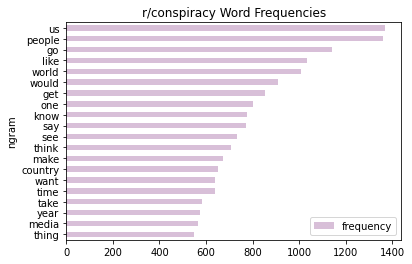

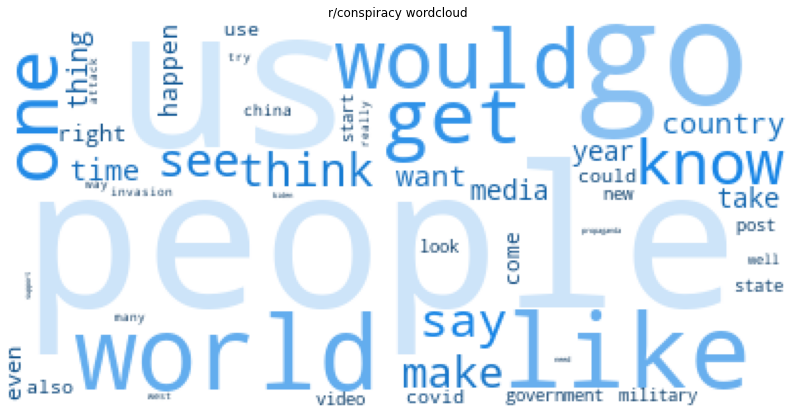

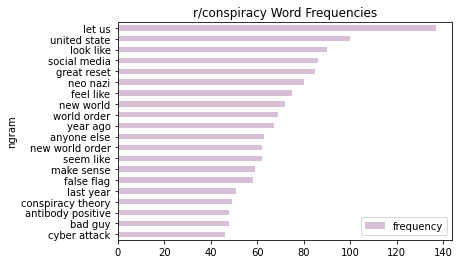

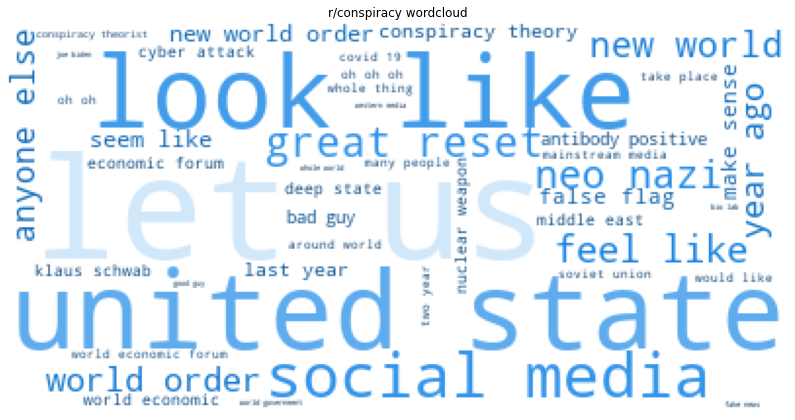

In [272]:
createWordCloud((1,1), None)
createWordCloud((2,3), 10000)

consp {'i': 1128, 'you': 2798, 'he': 1418, 'she': 181, 'they': 3528, 'we': 2052}
ukraine {'i': 2894, 'you': 7739, 'he': 2810, 'she': 549, 'they': 6779, 'we': 4065}


{'i': 17179, 'you': 11297, 'he': 3962, 'she': 729, 'they': 9386}
{'i': 4526, 'you': 2703, 'he': 1705, 'she': 164, 'they': 3981}

'i': 1081, 'you': 2703, 'he': 1705, 'she': 164, 'they': 3981

covid always in connection to war! in r/conspiracy

todo: i.e. filter for only nouns
check which pronouns are prevalent

In [273]:
def pronouns(df):
    pronouns_dict = {'i': 0, 'you': 0, 'he': 0, 'she': 0, 'they': 0}
    pronouns_dict['i'] = df['i']# + df['me'] + df['my'] + df['mine'] add i
    pronouns_dict['you'] = df['you']#  + df['yours'] + df['your']
    pronouns_dict['we'] = df['we']# + df['us'] + df['our'] + df['ours']
    pronouns_dict['they'] = df['they']# + df['them'] + df['their'] + df['theirs']
    pronouns_dict['he'] = df['he']# + df['him'] + df['his']
    pronouns_dict['she'] = df['she']# + df['her'] #+ df['hers']
    print(pronouns_dict)

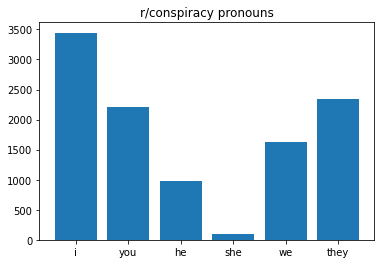

In [274]:
#plotPronouns({'i': 17179, 'you': 11297, 'he': 3962, 'she': 729, 'they': 9386})
#plotPronouns({'i': 4526, 'you': 2703, 'he': 1705, 'she': 164, 'they': 3981})
#plotPronouns({'i': 13052, 'you': 8698, 'he': 2025, 'she': 346, 'we': 4201, 'they': 4400})
plotPronouns({'i': 3445, 'you': 2204, 'he': 970, 'she': 96, 'we': 1632, 'they': 2335})

In [275]:
import matplotlib.pyplot as plt
def plotPronouns(data):
    names = list(data.keys())
    values = list(data.values())

    plt.bar(range(len(data)), values, tick_label=names)
    
    plt.title("r/conspiracy pronouns")
    plt.savefig("./images/conspiracy_pronouns.png")
    plt.show()